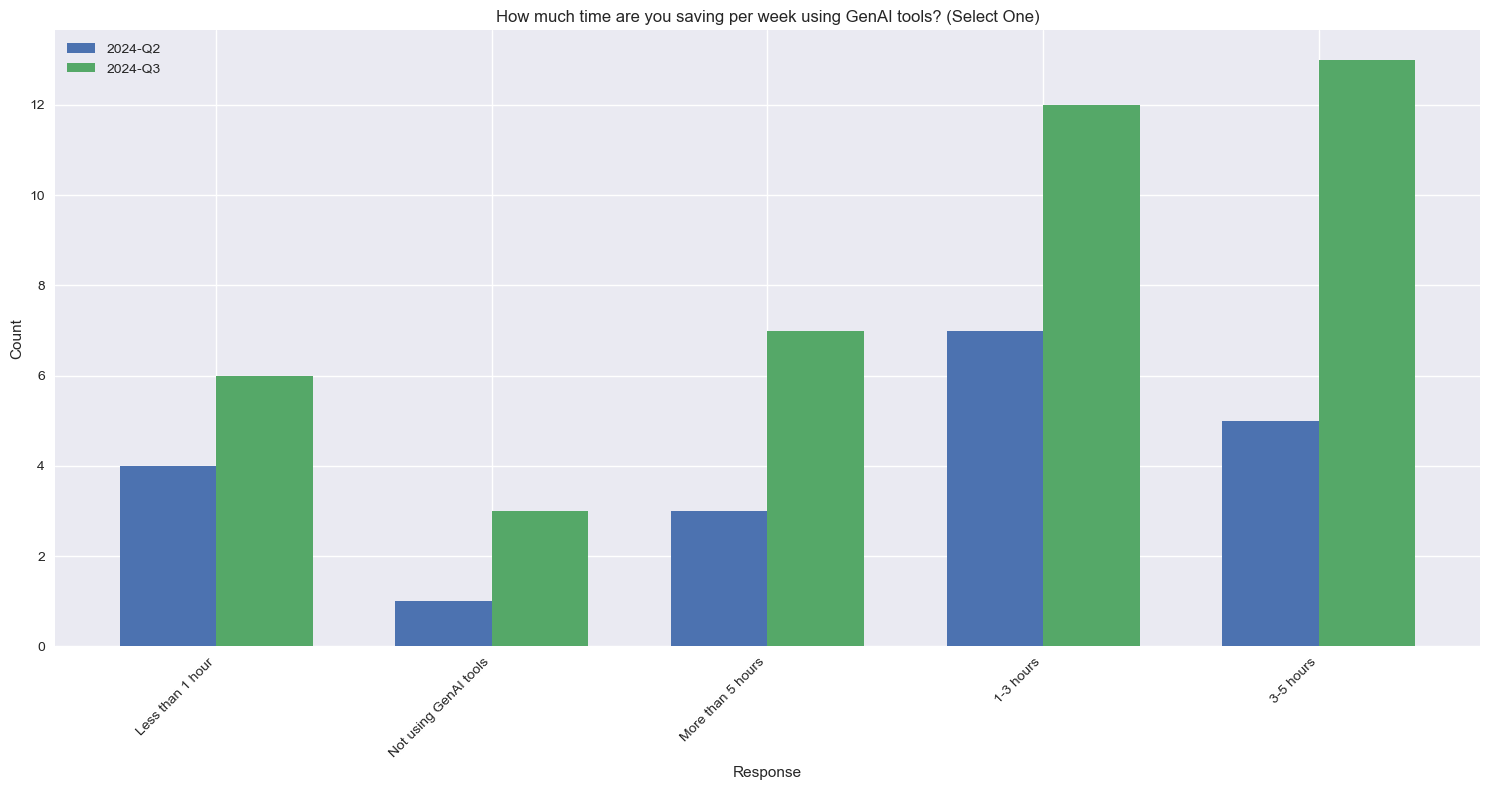

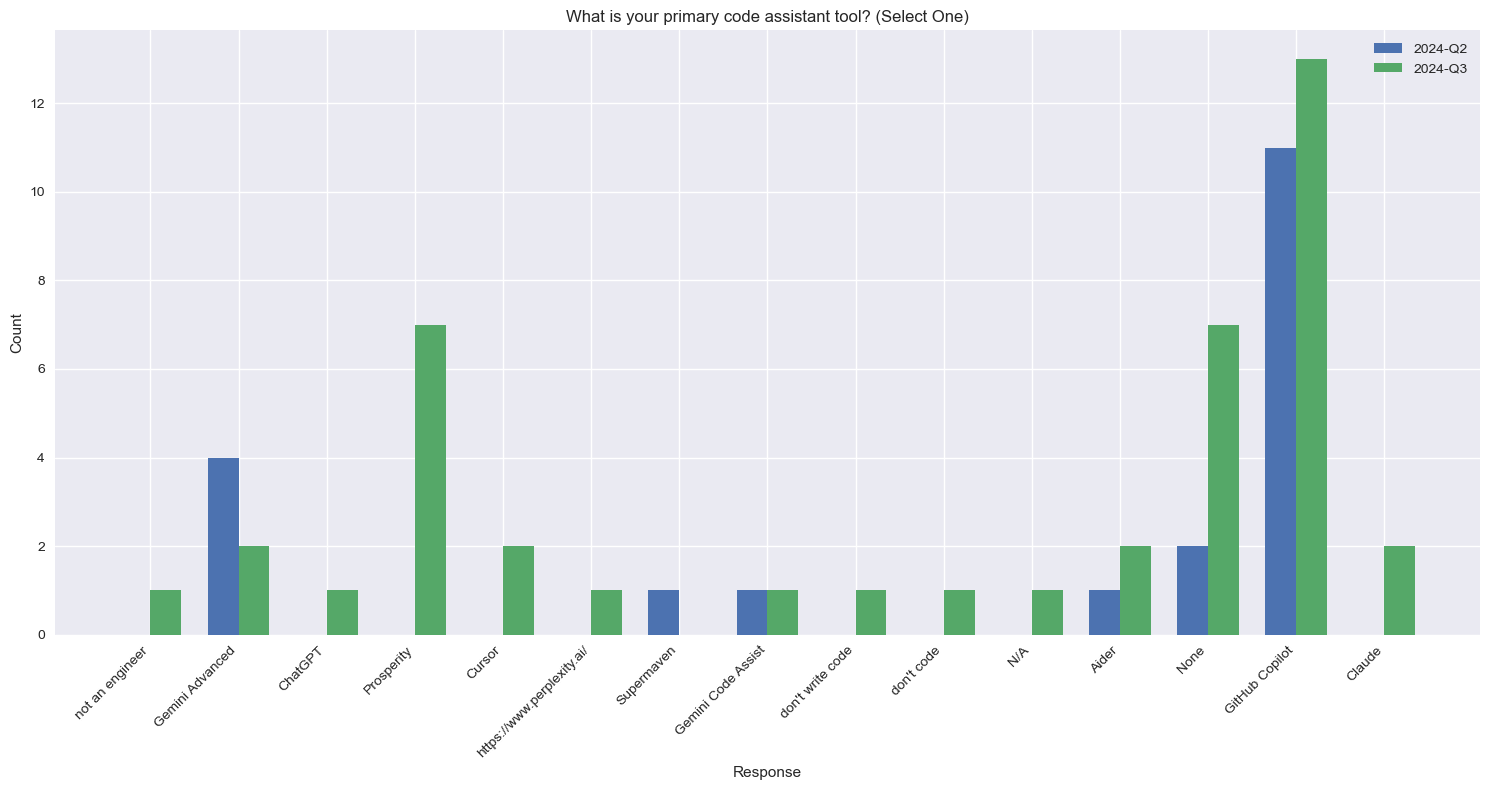

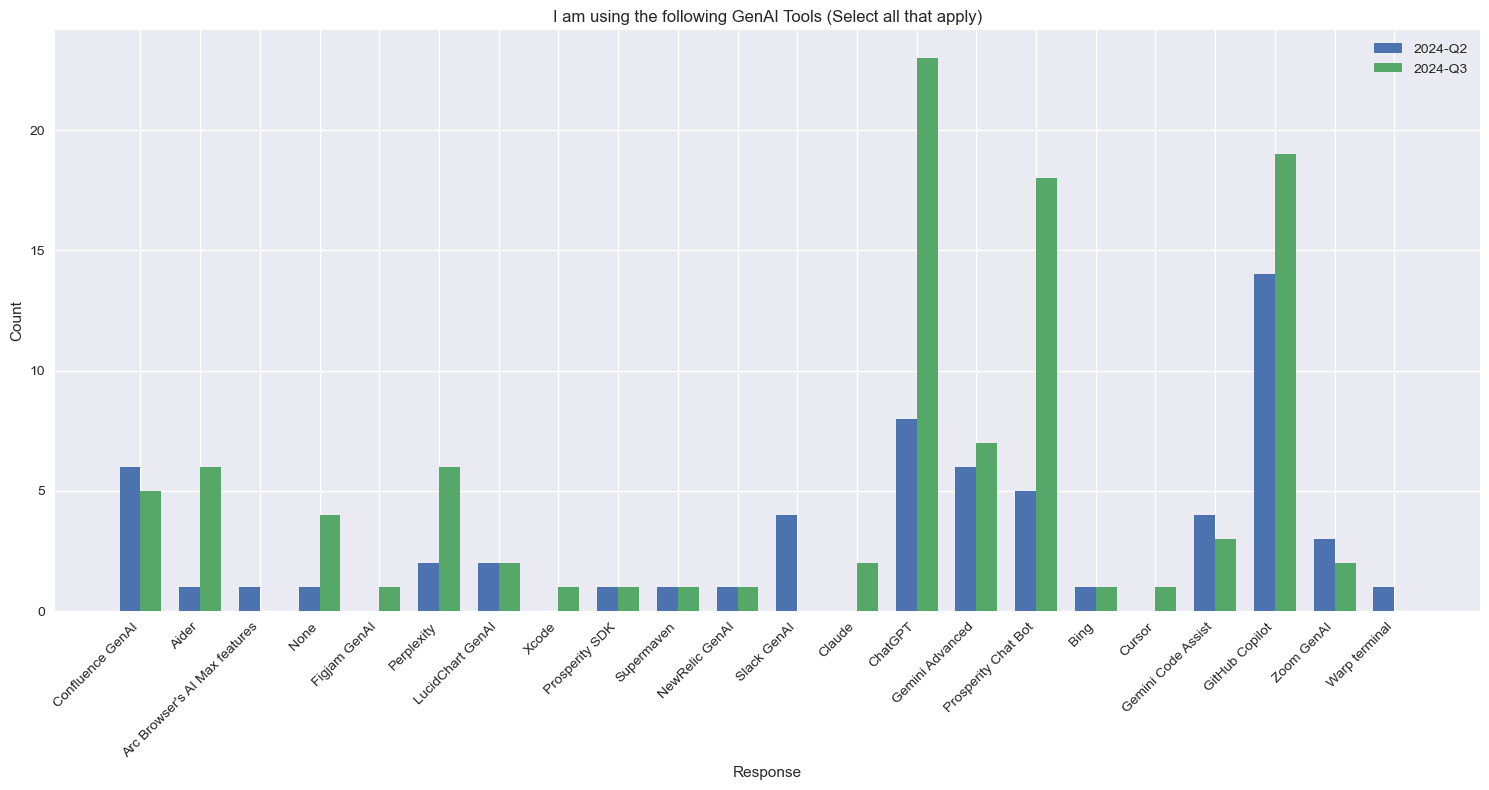

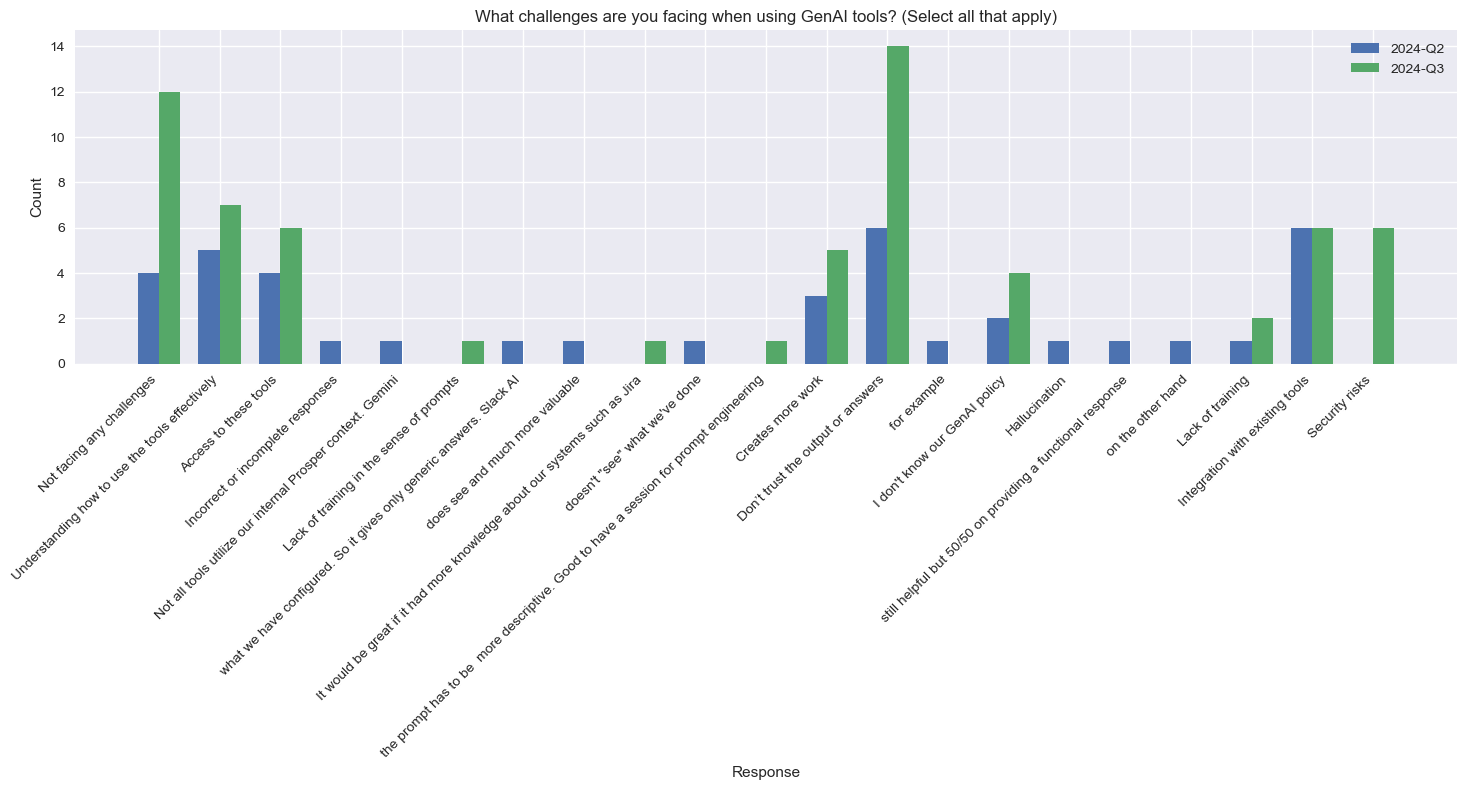

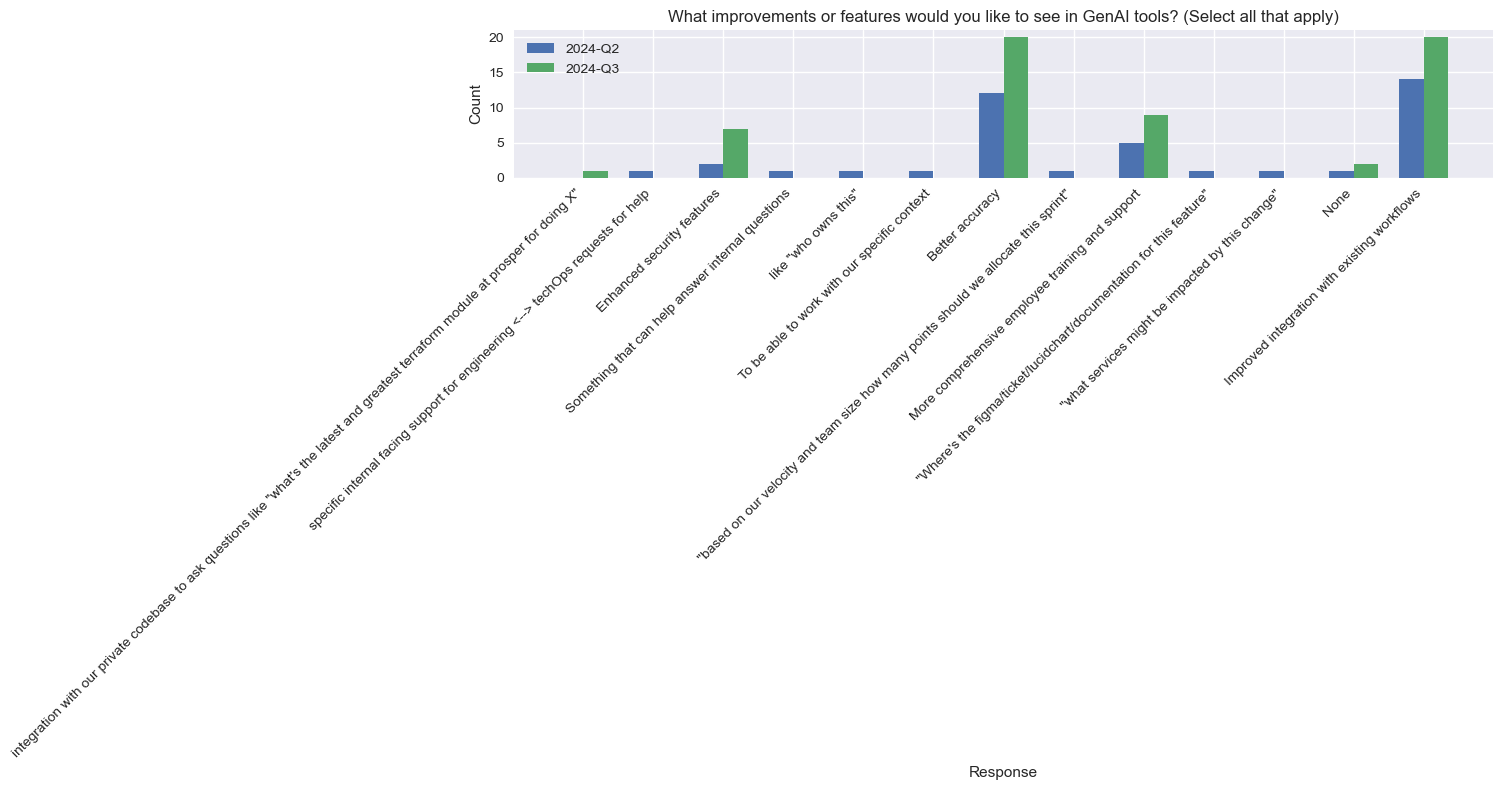

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from glob import glob

# Set style and figure size for better visualization
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [15, 8]

# Read all Excel files from the polls directory
poll_files = sorted([f for f in glob('polls/*.xlsx') if not os.path.basename(f).startswith('~')])

# Create a dictionary to store DataFrames
dfs = {}

# Read each file
for file in poll_files:
    quarter = os.path.basename(file).split('.')[0]  # Get quarter from filename
    dfs[quarter] = pd.read_excel(file, engine='openpyxl')

# Function to create comparison bar charts
def create_comparison_chart(question, dfs, title):
    plt.figure(figsize=(15, 8))
    
    # Get value counts for each quarter
    data_by_quarter = {}
    for quarter, df in dfs.items():
        counts = df[question].str.split(',').explode().str.strip().value_counts()
        data_by_quarter[quarter] = counts
    
    # Combine all unique values
    all_values = set()
    for counts in data_by_quarter.values():
        all_values.update(counts.index)
    
    # Create positions for bars
    bar_width = 0.35
    quarters = list(dfs.keys())
    
    # Create bars for each quarter
    for i, (quarter, counts) in enumerate(data_by_quarter.items()):
        positions = range(len(all_values))
        values = [counts.get(val, 0) for val in all_values]
        plt.bar([p + i*bar_width for p in positions], values, bar_width, label=quarter)
    
    plt.title(title)
    plt.xlabel('Response')
    plt.ylabel('Count')
    plt.xticks([p + bar_width/2 for p in range(len(all_values))], all_values, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Questions to analyze
questions = [
    'How much time are you saving per week using GenAI tools? (Select One)',
    'What is your primary code assistant tool? (Select One)',
    'I am using the following GenAI Tools (Select all that apply)',
    'What challenges are you facing when using GenAI tools? (Select all that apply)',
    'What improvements or features would you like to see in GenAI tools? (Select all that apply)'
]

# Create charts for each question
for question in questions:
    create_comparison_chart(question, dfs, question)